# Red Wine Quality Dataset and Neural Networks with Keras

linear units. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model

se busca entrenar un modelo lineal de redes nueronales el cual estime(regression) la calidad  `quality` de un vino a partir un conjunto de valores de sus features fisico-quimicos

In [109]:
import pandas as pd

red_wine = pd.read_csv('../datasets/red-wine.csv')
print(red_wine.info())
red_wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Input shape

se definen el numero de features o inputs a las neuronas del modelo, usaremos todas las 11 features de un vino excluyendo el `quality` ya que es el target


## Definir el modelo

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#create a network with 1 linear input
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

## Pesos o Tensores (Tensors)

Internally, Keras represents the weights of a neural network with tensors. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU) accelerators. TPUs, in fact, are designed specifically for tensor computations

A model's weights are kept in its weights attribute as a list of tensors.

In [111]:
w, bias = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, bias))

Weights
<tf.Variable 'dense_33/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.51499397],
       [ 0.6153148 ],
       [ 0.42795306],
       [ 0.32087308],
       [ 0.5128936 ],
       [-0.16711211],
       [-0.06104988],
       [-0.2966209 ],
       [ 0.18255806],
       [ 0.6827747 ],
       [-0.5919481 ]], dtype=float32)>

Bias
<tf.Variable 'dense_33/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


there's one weight for each input (and a bias).  There doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights

Keras represents weights as tensors, but also uses tensors to represent data. When you set the input_shape argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting input_shape=[3] would create a network accepting vectors of length 3, like [0.2, 0.4, 0.6].)

## Building Deep Neural Networks with sequential Layers

 to add non linearity to tackle more complex regression problems or recognice more deep and complex patterns and relationships in the data, we get a rectified linear unit or ReLU. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes max(0, w * x + b), this is a function that is aplied to a whole layer of neurons to increase the options of transformation of outputs and therefore increase the learning capacity of the model

 this funciton is called an activation function and it could be any transformation, ReLU es solo un ejemplo

In [112]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

The usual way of attaching an activation function to a Dense layer is to include it as part of the definition with the activation argument. Sometimes though you'll want to put some other layer between the Dense layer and its activation function.

 In this case, we can define the activation in its own Activation layer, like so:

 `layers.Dense(units=8),`

 `layers.Activation('relu'),`

 This is completely equivalent to the ordinary way: layers.Dense(units=8, activation='relu').

### Alternatives to ReLU
There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

### Graph activation Functions

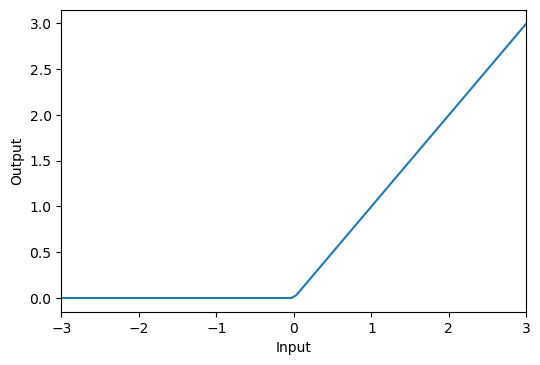

In [113]:
#Change 'relu' to 'elu', 'selu', 'swish'... 
# r something else in https://www.tensorflow.org/api_docs/python/tf/keras/activations
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

import matplotlib.pyplot as plt
plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Entrenamieto de la red neuronal y Stochastic Gradient Descent

 When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet. As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target.

 If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data

## Loss Function: ¿how good the network's predictions are?

we haven't seen how to tell a network what problem to solve. This is the job of the loss function.

The loss function measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at regression problems, where the task is to predict some numerical value, A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras). During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective


## The Optimizer - Stochastic Gradient Descent Or how can the model change the tensors(weights) to get better estimations

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

![](https://i.imgur.com/rFI1tIk.gif)

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

The animation shows the model of wine quality being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

### Why SGD?

The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD!


### Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. ``Adam`` is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

After defining a model, you can add a loss function and optimizer with the model's ``compile`` method:

In [114]:
model.compile(
    optimizer='adam',
    loss='mae'
)

## prepare Data: Sample and Validation sets

In [115]:
# Create training and validation splits
df_training = red_wine.sample(frac=0.7, random_state=0)
df_validation = red_wine.drop(df_training.index)
display(df_training.head(5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


las escalas de los imputs son importantes vamos a escalar los valores de los features a [0, 1]

neural networks tend to perform best when their inputs are on a common scale

If your number X falls between A and B, and you would like Y to fall between C and D, you can apply the following linear transform:

`Y = (X-A)/(B-A) * (D-C) + C`

para el caso de mapear a [0, 1], esta expresion se convierte en:

`Y = (X-A)/(B-A) `


In [116]:
max_ = red_wine.max(axis=0) #arreglo con los valores maximos de cada columna
min_ = red_wine.min(axis=0) #arreglo con los valores minimos de cada columna
df_training = (df_training - min_) / (max_ - min_) # mapear conjunto de entrenamiento
df_validation = (df_validation - min_) / (max_ - min_) #mapear conjunto de validacion
display(df_training.head(5))
display(df_validation.head(5))

# NO CORRER MULTIPLES VECES esta celda, correr el notebook completo en su lugar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.43,0.082192,0.265442,0.366197,0.212014,0.596916,0.338583,0.257485,0.369231,0.6
1032,0.309735,0.479452,0.00,0.219178,0.138564,0.056338,0.028269,0.621880,0.488189,0.119760,0.184615,0.4
1002,0.398230,0.116438,0.33,0.078767,0.085142,0.169014,0.074205,0.373715,0.409449,0.305389,0.507692,0.8
487,0.495575,0.359589,0.36,0.061644,0.068447,0.056338,0.028269,0.596916,0.338583,0.053892,0.246154,0.6
979,0.672566,0.226027,0.49,0.034247,0.105175,0.028169,0.000000,0.501468,0.307087,0.179641,0.307692,0.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8
11,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4
23,0.345133,0.253425,0.11,0.095890,0.120200,0.112676,0.215548,0.494126,0.338583,0.119760,0.153846,0.4


In [117]:
# Split features and target
X_train = df_training.drop('quality', axis=1)   #features de entrenamiento
X_valid = df_validation.drop('quality', axis=1) #features de validacion
y_train = df_training['quality']    # valores esperados de entrenamiento (labels)
y_valid = df_validation['quality']  # valores a estimar por el modelo
# se le esta haciendo drop a una copia de los dataframes de training y validation

## Training

In [118]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200
)

Epoch 1/200
5/5 [==============================] - 1s 124ms/step - loss: 0.3559 - val_loss: 0.1294
Epoch 2/200
5/5 [==============================] - 0s 96ms/step - loss: 0.1378 - val_loss: 0.1237
Epoch 3/200
5/5 [==============================] - 0s 54ms/step - loss: 0.1280 - val_loss: 0.1174
Epoch 4/200
5/5 [==============================] - 0s 51ms/step - loss: 0.1153 - val_loss: 0.1140
Epoch 5/200
5/5 [==============================] - 0s 91ms/step - loss: 0.1160 - val_loss: 0.1073
Epoch 6/200
5/5 [==============================] - 0s 86ms/step - loss: 0.1115 - val_loss: 0.1057
Epoch 7/200
5/5 [==============================] - 1s 126ms/step - loss: 0.1084 - val_loss: 0.1061
Epoch 8/200
5/5 [==============================] - 0s 115ms/step - loss: 0.1066 - val_loss: 0.1030
Epoch 9/200
5/5 [==============================] - 0s 88ms/step - loss: 0.1050 - val_loss: 0.1059
Epoch 10/200
5/5 [==============================] - 0s 91ms/step - loss: 0.1042 - val_loss: 0.1009
Epoch 11/200
5/5

 We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 12 times all the way through the dataset (the epochs).

 let see the change of MAE loss though the difetents iterations of the traininig

<AxesSubplot:>

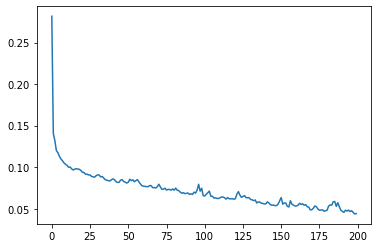

In [119]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()